In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
# train_data[0]
train_labels[0]

1

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]
)
# reverse_word_index
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3 , '?') for i in train_data[0]]
)

In [5]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [14]:
x_val.shape

(10000, 10000)

In [15]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
print(y_val)
print(y_val.shape)

[ 1.  0.  0. ...,  1.  0.  0.]
(10000,)


In [17]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20


  512/15000 [>.............................] - ETA: 2:40 - loss: 0.6939 - acc: 0.5020

 1024/15000 [=>............................] - ETA: 1:21 - loss: 0.6918 - acc: 0.5332

 1536/15000 [==>...........................] - ETA: 53s - loss: 0.6847 - acc: 0.5488 

 2048/15000 [===>..........................] - ETA: 40s - loss: 0.6750 - acc: 0.5952

 2560/15000 [====>.........................] - ETA: 31s - loss: 0.6626 - acc: 0.6258

 3072/15000 [=====>........................] - ETA: 26s - loss: 0.6514 - acc: 0.6520

 3584/15000 [======>.......................] - ETA: 22s - loss: 0.6394 - acc: 0.6749

 4096/15000 [=======>......................] - ETA: 19s - loss: 0.6278 - acc: 0.6909

 4608/15000 [========>.....................] - ETA: 16s - loss: 0.6164 - acc: 0.7068

 5120/15000 [=========>....................] - ETA: 14s - loss: 0.6082 - acc: 0.7088

 5632/15000 [==========>...................] - ETA: 12s - loss: 0.6033 - acc: 0.7115

 6144/15000 [===========>..................] - ETA: 11s - loss: 0.5965 - acc: 0.7153

 6656/15000 [============>.................] - ETA: 10s - loss: 0.5896 - acc: 0.7231

 7168/15000 [=============>................] - ETA: 9s - loss: 0.5813 - acc: 0.7319 

 7680/15000 [==============>...............] - ETA: 8s - loss: 0.5719 - acc: 0.7419

 8192/15000 [===============>..............] - ETA: 7s - loss: 0.5659 - acc: 0.7467

 8704/15000 [================>.............] - ETA: 6s - loss: 0.5589 - acc: 0.7524

 9216/15000 [=================>............] - ETA: 5s - loss: 0.5527 - acc: 0.7587

 9728/15000 [==================>...........] - ETA: 4s - loss: 0.5475 - acc: 0.7632

10240/15000 [===================>..........] - ETA: 4s - loss: 0.5410 - acc: 0.7686

10752/15000 [====================>.........] - ETA: 3s - loss: 0.5359 - acc: 0.7731

11264/15000 [=====================>........] - ETA: 3s - loss: 0.5304 - acc: 0.7772

11776/15000 [======================>.......] - ETA: 2s - loss: 0.5259 - acc: 0.7788

12288/15000 [=======================>......] - ETA: 2s - loss: 0.5220 - acc: 0.7812

12800/15000 [========================>.....] - ETA: 1s - loss: 0.5167 - acc: 0.7843

13312/15000 [=========================>....] - ETA: 1s - loss: 0.5120 - acc: 0.7868

13824/15000 [==========================>...] - ETA: 0s - loss: 0.5078 - acc: 0.7891

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5034 - acc: 0.7919

14848/15000 [============================>.] - ETA: 0s - loss: 0.4991 - acc: 0.7945

15000/15000 [==============================] - 14s 954us/step - loss: 0.4975 - acc: 0.7956 - val_loss: 0.3717 - val_acc: 0.8718


Epoch 2/20
  512/15000 [>.............................] - ETA: 5s - loss: 0.3128 - acc: 0.9062

 1024/15000 [=>............................] - ETA: 5s - loss: 0.3101 - acc: 0.9170

 1536/15000 [==>...........................] - ETA: 4s - loss: 0.3223 - acc: 0.9102

 2048/15000 [===>..........................] - ETA: 3s - loss: 0.3174 - acc: 0.9116

 2560/15000 [====>.........................] - ETA: 3s - loss: 0.3128 - acc: 0.9125

 3072/15000 [=====>........................] - ETA: 3s - loss: 0.3108 - acc: 0.9131

 3584/15000 [======>.......................] - ETA: 3s - loss: 0.3086 - acc: 0.9146

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.3070 - acc: 0.9143

 4608/15000 [========>.....................] - ETA: 2s - loss: 0.3032 - acc: 0.9151



 5120/15000 [=========>....................] - ETA: 2s - loss: 0.2998 - acc: 0.9172

 5632/15000 [==========>...................] - ETA: 2s - loss: 0.3012 - acc: 0.9144

 6144/15000 [===========>..................] - ETA: 2s - loss: 0.2977 - acc: 0.9155

 6656/15000 [============>.................] - ETA: 1s - loss: 0.3020 - acc: 0.9103

 7168/15000 [=============>................] - ETA: 1s - loss: 0.3045 - acc: 0.9075

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.3069 - acc: 0.9053

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.3055 - acc: 0.9052

 8704/15000 [================>.............] - ETA: 1s - loss: 0.3057 - acc: 0.9048

 9216/15000 [=================>............] - ETA: 1s - loss: 0.3049 - acc: 0.9048

 9728/15000 [==================>...........] - ETA: 1s - loss: 0.3041 - acc: 0.9050

10240/15000 [===================>..........] - ETA: 1s - loss: 0.3028 - acc: 0.9063

10752/15000 [====================>.........] - ETA: 0s - loss: 0.3028 - acc: 0.9067

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3030 - acc: 0.9054

11776/15000 [======================>.......] - ETA: 0s - loss: 0.3011 - acc: 0.9065

12288/15000 [=======================>......] - ETA: 0s - loss: 0.3009 - acc: 0.9045

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2991 - acc: 0.9052

13312/15000 [=========================>....] - ETA: 0s - loss: 0.2987 - acc: 0.9045

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2981 - acc: 0.9040

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2974 - acc: 0.9042

14848/15000 [============================>.] - ETA: 0s - loss: 0.2961 - acc: 0.9046

15000/15000 [==============================] - 5s 307us/step - loss: 0.2958 - acc: 0.9048 - val_loss: 0.2991 - val_acc: 0.8905


Epoch 3/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.2086 - acc: 0.9355

 1024/15000 [=>............................] - ETA: 2s - loss: 0.2267 - acc: 0.9297

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.2209 - acc: 0.9323

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.2191 - acc: 0.9336

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.2172 - acc: 0.9352

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.2218 - acc: 0.9310

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.2229 - acc: 0.9291

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.2208 - acc: 0.9314

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.2198 - acc: 0.9314

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.2193 - acc: 0.9307

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.2216 - acc: 0.9306

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.2197 - acc: 0.9312

 6656/15000 [============>.................] - ETA: 1s - loss: 0.2189 - acc: 0.9309

 7168/15000 [=============>................] - ETA: 1s - loss: 0.2196 - acc: 0.9307

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.2201 - acc: 0.9299

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.2194 - acc: 0.9293

 8704/15000 [================>.............] - ETA: 1s - loss: 0.2208 - acc: 0.9272

 9216/15000 [=================>............] - ETA: 1s - loss: 0.2206 - acc: 0.9276

 9728/15000 [==================>...........] - ETA: 1s - loss: 0.2199 - acc: 0.9278

10240/15000 [===================>..........] - ETA: 0s - loss: 0.2182 - acc: 0.9280

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2185 - acc: 0.9280

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2190 - acc: 0.9277

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2183 - acc: 0.9278

12288/15000 [=======================>......] - ETA: 0s - loss: 0.2195 - acc: 0.9265

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2181 - acc: 0.9273

13312/15000 [=========================>....] - ETA: 0s - loss: 0.2175 - acc: 0.9278

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2163 - acc: 0.9282

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2163 - acc: 0.9282

14848/15000 [============================>.] - ETA: 0s - loss: 0.2161 - acc: 0.9287

15000/15000 [==============================] - 4s 290us/step - loss: 0.2160 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8719


Epoch 4/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.1924 - acc: 0.9434

 1024/15000 [=>............................] - ETA: 2s - loss: 0.1925 - acc: 0.9346

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.1877 - acc: 0.9388

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.1838 - acc: 0.9429

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.1839 - acc: 0.9422

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.1808 - acc: 0.9450

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.1751 - acc: 0.9481

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.1763 - acc: 0.9473

 4608/15000 [========>.....................] - ETA: 2s - loss: 0.1745 - acc: 0.9488

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.1753 - acc: 0.9482

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.1763 - acc: 0.9464

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.1759 - acc: 0.9456

 6656/15000 [============>.................] - ETA: 1s - loss: 0.1743 - acc: 0.9468

 7168/15000 [=============>................] - ETA: 1s - loss: 0.1740 - acc: 0.9463

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.1732 - acc: 0.9474

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.1722 - acc: 0.9478

 8704/15000 [================>.............] - ETA: 1s - loss: 0.1716 - acc: 0.9474

 9216/15000 [=================>............] - ETA: 1s - loss: 0.1712 - acc: 0.9476

 9728/15000 [==================>...........] - ETA: 1s - loss: 0.1706 - acc: 0.9477

10240/15000 [===================>..........] - ETA: 0s - loss: 0.1712 - acc: 0.9476

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1724 - acc: 0.9464

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1733 - acc: 0.9454

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1736 - acc: 0.9447

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1753 - acc: 0.9439

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1760 - acc: 0.9429

13312/15000 [=========================>....] - ETA: 0s - loss: 0.1763 - acc: 0.9425

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1755 - acc: 0.9429

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1753 - acc: 0.9431

14848/15000 [============================>.] - ETA: 0s - loss: 0.1744 - acc: 0.9430

15000/15000 [==============================] - 4s 281us/step - loss: 0.1741 - acc: 0.9431 - val_loss: 0.2831 - val_acc: 0.8844


Epoch 5/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.1283 - acc: 0.9727

 1024/15000 [=>............................] - ETA: 2s - loss: 0.1373 - acc: 0.9658

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.1413 - acc: 0.9629

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.1361 - acc: 0.9644

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.1359 - acc: 0.9641

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.1367 - acc: 0.9652

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.1341 - acc: 0.9657

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.1328 - acc: 0.9656

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.1335 - acc: 0.9644

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.1324 - acc: 0.9643

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.1346 - acc: 0.9632

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.1374 - acc: 0.9611

 6656/15000 [============>.................] - ETA: 1s - loss: 0.1398 - acc: 0.9593

 7168/15000 [=============>................] - ETA: 1s - loss: 0.1394 - acc: 0.9587

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.1399 - acc: 0.9582

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.1387 - acc: 0.9576

 8704/15000 [================>.............] - ETA: 1s - loss: 0.1382 - acc: 0.9581

 9216/15000 [=================>............] - ETA: 1s - loss: 0.1380 - acc: 0.9582

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1381 - acc: 0.9582

10240/15000 [===================>..........] - ETA: 0s - loss: 0.1381 - acc: 0.9577

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1393 - acc: 0.9568

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1393 - acc: 0.9565

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1398 - acc: 0.9563

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1402 - acc: 0.9559

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1400 - acc: 0.9554

13312/15000 [=========================>....] - ETA: 0s - loss: 0.1407 - acc: 0.9552

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1416 - acc: 0.9543

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1416 - acc: 0.9540

14848/15000 [============================>.] - ETA: 0s - loss: 0.1412 - acc: 0.9543

15000/15000 [==============================] - 4s 277us/step - loss: 0.1414 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8850


Epoch 6/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.1241 - acc: 0.9668

 1024/15000 [=>............................] - ETA: 2s - loss: 0.1197 - acc: 0.9658

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.1150 - acc: 0.9681

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.1083 - acc: 0.9727

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.1045 - acc: 0.9719

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.1070 - acc: 0.9710

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.1058 - acc: 0.9710

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.1068 - acc: 0.9714

 4608/15000 [========>.....................] - ETA: 2s - loss: 0.1115 - acc: 0.9694

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.1157 - acc: 0.9668

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.1146 - acc: 0.9670

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.1136 - acc: 0.9671

 6656/15000 [============>.................] - ETA: 1s - loss: 0.1144 - acc: 0.9668

 7168/15000 [=============>................] - ETA: 1s - loss: 0.1151 - acc: 0.9665

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.1154 - acc: 0.9659

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.1150 - acc: 0.9656

 8704/15000 [================>.............] - ETA: 1s - loss: 0.1153 - acc: 0.9651

 9216/15000 [=================>............] - ETA: 1s - loss: 0.1150 - acc: 0.9651

 9728/15000 [==================>...........] - ETA: 1s - loss: 0.1146 - acc: 0.9654

10240/15000 [===================>..........] - ETA: 0s - loss: 0.1138 - acc: 0.9656

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1145 - acc: 0.9654

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1138 - acc: 0.9651

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1138 - acc: 0.9652

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1146 - acc: 0.9649

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1142 - acc: 0.9652

13312/15000 [=========================>....] - ETA: 0s - loss: 0.1147 - acc: 0.9651

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1147 - acc: 0.9651

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1142 - acc: 0.9653

14848/15000 [============================>.] - ETA: 0s - loss: 0.1141 - acc: 0.9654

15000/15000 [==============================] - 4s 288us/step - loss: 0.1143 - acc: 0.9655 - val_loss: 0.3074 - val_acc: 0.8820


Epoch 7/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.0946 - acc: 0.9727

 1024/15000 [=>............................] - ETA: 3s - loss: 0.0935 - acc: 0.9736

 1536/15000 [==>...........................] - ETA: 3s - loss: 0.0947 - acc: 0.9720

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.0939 - acc: 0.9731

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.0928 - acc: 0.9750

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.0956 - acc: 0.9736

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.0927 - acc: 0.9738

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.0909 - acc: 0.9753

 4608/15000 [========>.....................] - ETA: 2s - loss: 0.0911 - acc: 0.9753

 5120/15000 [=========>....................] - ETA: 2s - loss: 0.0912 - acc: 0.9748

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0905 - acc: 0.9755

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.0920 - acc: 0.9741

 6656/15000 [============>.................] - ETA: 1s - loss: 0.0919 - acc: 0.9740

 7168/15000 [=============>................] - ETA: 1s - loss: 0.0940 - acc: 0.9728

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.0938 - acc: 0.9730

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.0951 - acc: 0.9723

 8704/15000 [================>.............] - ETA: 1s - loss: 0.0948 - acc: 0.9722

 9216/15000 [=================>............] - ETA: 1s - loss: 0.0949 - acc: 0.9723

 9728/15000 [==================>...........] - ETA: 1s - loss: 0.0960 - acc: 0.9718

10240/15000 [===================>..........] - ETA: 1s - loss: 0.0961 - acc: 0.9719

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0964 - acc: 0.9715

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0974 - acc: 0.9704

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0966 - acc: 0.9708

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0964 - acc: 0.9711

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0965 - acc: 0.9707

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0967 - acc: 0.9709

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0971 - acc: 0.9704

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0969 - acc: 0.9707

14848/15000 [============================>.] - ETA: 0s - loss: 0.0970 - acc: 0.9706

15000/15000 [==============================] - 5s 307us/step - loss: 0.0969 - acc: 0.9707 - val_loss: 0.3150 - val_acc: 0.8840


Epoch 8/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.0721 - acc: 0.9844

 1024/15000 [=>............................] - ETA: 2s - loss: 0.0669 - acc: 0.9854

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.0706 - acc: 0.9818

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.0700 - acc: 0.9829

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.0685 - acc: 0.9836

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.0710 - acc: 0.9814

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.0722 - acc: 0.9805

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.0731 - acc: 0.9805

 4608/15000 [========>.....................] - ETA: 2s - loss: 0.0757 - acc: 0.9787

 5120/15000 [=========>....................] - ETA: 2s - loss: 0.0761 - acc: 0.9783

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0748 - acc: 0.9790

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.0753 - acc: 0.9793

 6656/15000 [============>.................] - ETA: 1s - loss: 0.0749 - acc: 0.9788

 7168/15000 [=============>................] - ETA: 1s - loss: 0.0744 - acc: 0.9789

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.0743 - acc: 0.9792

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.0738 - acc: 0.9794

 8704/15000 [================>.............] - ETA: 1s - loss: 0.0754 - acc: 0.9789

 9216/15000 [=================>............] - ETA: 1s - loss: 0.0774 - acc: 0.9781

 9728/15000 [==================>...........] - ETA: 1s - loss: 0.0782 - acc: 0.9772

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0793 - acc: 0.9767

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0801 - acc: 0.9764

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0794 - acc: 0.9767

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0795 - acc: 0.9767

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0795 - acc: 0.9768

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0795 - acc: 0.9766

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0790 - acc: 0.9767

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0787 - acc: 0.9771

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0791 - acc: 0.9771

14848/15000 [============================>.] - ETA: 0s - loss: 0.0793 - acc: 0.9769

15000/15000 [==============================] - 5s 302us/step - loss: 0.0803 - acc: 0.9764 - val_loss: 0.3868 - val_acc: 0.8658


Epoch 9/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.0824 - acc: 0.9746

 1024/15000 [=>............................] - ETA: 2s - loss: 0.0644 - acc: 0.9844

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.0647 - acc: 0.9824

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.0621 - acc: 0.9849

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.0588 - acc: 0.9867

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.0593 - acc: 0.9870

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.0583 - acc: 0.9874

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.0585 - acc: 0.9875

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0589 - acc: 0.9872

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0606 - acc: 0.9859

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0622 - acc: 0.9851

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.0615 - acc: 0.9854

 6656/15000 [============>.................] - ETA: 1s - loss: 0.0610 - acc: 0.9853

 7168/15000 [=============>................] - ETA: 1s - loss: 0.0612 - acc: 0.9854

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.0611 - acc: 0.9853

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.0613 - acc: 0.9851

 8704/15000 [================>.............] - ETA: 1s - loss: 0.0618 - acc: 0.9846

 9216/15000 [=================>............] - ETA: 1s - loss: 0.0624 - acc: 0.9847

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0634 - acc: 0.9839

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0649 - acc: 0.9828

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0665 - acc: 0.9821

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0667 - acc: 0.9820

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0667 - acc: 0.9822

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0669 - acc: 0.9819

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0666 - acc: 0.9823

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0663 - acc: 0.9822

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0658 - acc: 0.9822

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0656 - acc: 0.9824

14848/15000 [============================>.] - ETA: 0s - loss: 0.0655 - acc: 0.9823

15000/15000 [==============================] - 5s 314us/step - loss: 0.0658 - acc: 0.9820 - val_loss: 0.3650 - val_acc: 0.8776


Epoch 10/20
  512/15000 [>.............................] - ETA: 3s - loss: 0.0543 - acc: 0.9922

 1024/15000 [=>............................] - ETA: 3s - loss: 0.0500 - acc: 0.9922

 1536/15000 [==>...........................] - ETA: 3s - loss: 0.0511 - acc: 0.9915

 2048/15000 [===>..........................] - ETA: 3s - loss: 0.0509 - acc: 0.9907

 2560/15000 [====>.........................] - ETA: 3s - loss: 0.0514 - acc: 0.9887

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.0520 - acc: 0.9889

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.0532 - acc: 0.9883

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.0528 - acc: 0.9885

 4608/15000 [========>.....................] - ETA: 2s - loss: 0.0524 - acc: 0.9889

 5120/15000 [=========>....................] - ETA: 2s - loss: 0.0522 - acc: 0.9881

 5632/15000 [==========>...................] - ETA: 2s - loss: 0.0523 - acc: 0.9879

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.0517 - acc: 0.9883

 6656/15000 [============>.................] - ETA: 1s - loss: 0.0512 - acc: 0.9887

 7168/15000 [=============>................] - ETA: 1s - loss: 0.0521 - acc: 0.9883

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.0524 - acc: 0.9885

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.0523 - acc: 0.9884

 8704/15000 [================>.............] - ETA: 1s - loss: 0.0524 - acc: 0.9883

 9216/15000 [=================>............] - ETA: 1s - loss: 0.0524 - acc: 0.9882

 9728/15000 [==================>...........] - ETA: 1s - loss: 0.0527 - acc: 0.9879

10240/15000 [===================>..........] - ETA: 1s - loss: 0.0534 - acc: 0.9875

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0530 - acc: 0.9874

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0538 - acc: 0.9870

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0549 - acc: 0.9861

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0559 - acc: 0.9853

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0560 - acc: 0.9851

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0557 - acc: 0.9851

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0553 - acc: 0.9853

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0549 - acc: 0.9856

14848/15000 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.9853

15000/15000 [==============================] - 5s 307us/step - loss: 0.0553 - acc: 0.9850 - val_loss: 0.3866 - val_acc: 0.8787


Epoch 11/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.0406 - acc: 0.9922

 1024/15000 [=>............................] - ETA: 2s - loss: 0.0363 - acc: 0.9951

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.0322 - acc: 0.9967

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.0360 - acc: 0.9946

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.0360 - acc: 0.9953

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.0355 - acc: 0.9954

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.0350 - acc: 0.9955

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.0342 - acc: 0.9954

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0338 - acc: 0.9950

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0352 - acc: 0.9941

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0357 - acc: 0.9940

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.0363 - acc: 0.9938

 6656/15000 [============>.................] - ETA: 1s - loss: 0.0357 - acc: 0.9940

 7168/15000 [=============>................] - ETA: 1s - loss: 0.0366 - acc: 0.9933

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.0370 - acc: 0.9931

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.0393 - acc: 0.9921

 8704/15000 [================>.............] - ETA: 1s - loss: 0.0440 - acc: 0.9897

 9216/15000 [=================>............] - ETA: 1s - loss: 0.0450 - acc: 0.9893

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0451 - acc: 0.9892

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0449 - acc: 0.9891

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0448 - acc: 0.9889

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0452 - acc: 0.9886

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0450 - acc: 0.9886

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0453 - acc: 0.9885

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0451 - acc: 0.9888

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0451 - acc: 0.9887

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0449 - acc: 0.9889

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0456 - acc: 0.9884

14848/15000 [============================>.] - ETA: 0s - loss: 0.0456 - acc: 0.9884

15000/15000 [==============================] - 4s 289us/step - loss: 0.0455 - acc: 0.9885 - val_loss: 0.4185 - val_acc: 0.8764


Epoch 12/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.0297 - acc: 0.9961

 1024/15000 [=>............................] - ETA: 2s - loss: 0.0285 - acc: 0.9961

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.0279 - acc: 0.9967

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.0272 - acc: 0.9971

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.0279 - acc: 0.9973

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.0279 - acc: 0.9971

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.0278 - acc: 0.9972

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.0275 - acc: 0.9976

 4608/15000 [========>.....................] - ETA: 2s - loss: 0.0284 - acc: 0.9970

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0296 - acc: 0.9963

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0314 - acc: 0.9950

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.0322 - acc: 0.9950

 6656/15000 [============>.................] - ETA: 1s - loss: 0.0318 - acc: 0.9950

 7168/15000 [=============>................] - ETA: 1s - loss: 0.0319 - acc: 0.9950

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.0314 - acc: 0.9952

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.0314 - acc: 0.9950

 8704/15000 [================>.............] - ETA: 1s - loss: 0.0312 - acc: 0.9951

 9216/15000 [=================>............] - ETA: 1s - loss: 0.0318 - acc: 0.9947

 9728/15000 [==================>...........] - ETA: 1s - loss: 0.0319 - acc: 0.9948

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0318 - acc: 0.9949

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0324 - acc: 0.9947

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0322 - acc: 0.9948

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0324 - acc: 0.9947

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0326 - acc: 0.9945

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0331 - acc: 0.9940

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0346 - acc: 0.9932

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0377 - acc: 0.9915

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0383 - acc: 0.9914

14848/15000 [============================>.] - ETA: 0s - loss: 0.0386 - acc: 0.9912

15000/15000 [==============================] - 5s 309us/step - loss: 0.0386 - acc: 0.9912 - val_loss: 0.4523 - val_acc: 0.8699


Epoch 13/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.0248 - acc: 0.9980

 1024/15000 [=>............................] - ETA: 2s - loss: 0.0225 - acc: 0.9990

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.0246 - acc: 0.9980

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.0273 - acc: 0.9961

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.0270 - acc: 0.9961

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.0259 - acc: 0.9964

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.0254 - acc: 0.9967

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.0244 - acc: 0.9971

 4608/15000 [========>.....................] - ETA: 2s - loss: 0.0245 - acc: 0.9972

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0241 - acc: 0.9973

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0236 - acc: 0.9972

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.0239 - acc: 0.9971

 6656/15000 [============>.................] - ETA: 1s - loss: 0.0241 - acc: 0.9968

 7168/15000 [=============>................] - ETA: 1s - loss: 0.0240 - acc: 0.9968

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.0251 - acc: 0.9961

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.0250 - acc: 0.9963

 8704/15000 [================>.............] - ETA: 1s - loss: 0.0247 - acc: 0.9966

 9216/15000 [=================>............] - ETA: 1s - loss: 0.0249 - acc: 0.9962

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0248 - acc: 0.9964

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0252 - acc: 0.9963

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0250 - acc: 0.9965

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0256 - acc: 0.9963

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0258 - acc: 0.9963

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0268 - acc: 0.9958

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0282 - acc: 0.9949

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0295 - acc: 0.9942

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0300 - acc: 0.9939

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0300 - acc: 0.9938

14848/15000 [============================>.] - ETA: 0s - loss: 0.0299 - acc: 0.9939

15000/15000 [==============================] - 4s 276us/step - loss: 0.0298 - acc: 0.9939 - val_loss: 0.4717 - val_acc: 0.8734


Epoch 14/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.0185 - acc: 0.9980

 1024/15000 [=>............................] - ETA: 2s - loss: 0.0190 - acc: 0.9980

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.0193 - acc: 0.9980

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.0185 - acc: 0.9985

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.0184 - acc: 0.9980

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.0198 - acc: 0.9974

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.0193 - acc: 0.9975

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.0190 - acc: 0.9978

 4608/15000 [========>.....................] - ETA: 2s - loss: 0.0190 - acc: 0.9974

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0192 - acc: 0.9973

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0193 - acc: 0.9973

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.0193 - acc: 0.9974

 6656/15000 [============>.................] - ETA: 1s - loss: 0.0193 - acc: 0.9974

 7168/15000 [=============>................] - ETA: 1s - loss: 0.0196 - acc: 0.9973

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.0192 - acc: 0.9975

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.0192 - acc: 0.9976

 8704/15000 [================>.............] - ETA: 1s - loss: 0.0193 - acc: 0.9975

 9216/15000 [=================>............] - ETA: 1s - loss: 0.0195 - acc: 0.9973

 9728/15000 [==================>...........] - ETA: 1s - loss: 0.0200 - acc: 0.9969

10240/15000 [===================>..........] - ETA: 1s - loss: 0.0221 - acc: 0.9956

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0241 - acc: 0.9944

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0251 - acc: 0.9941

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0249 - acc: 0.9944

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0249 - acc: 0.9943

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0248 - acc: 0.9945

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0246 - acc: 0.9946

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0245 - acc: 0.9947

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0246 - acc: 0.9948

14848/15000 [============================>.] - ETA: 0s - loss: 0.0245 - acc: 0.9949

15000/15000 [==============================] - 5s 332us/step - loss: 0.0244 - acc: 0.9949 - val_loss: 0.5030 - val_acc: 0.8715


Epoch 15/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.0105 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 2s - loss: 0.0125 - acc: 0.9990

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.0146 - acc: 0.9974

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.0144 - acc: 0.9976

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.0143 - acc: 0.9977

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.0144 - acc: 0.9980

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.0148 - acc: 0.9983

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.0148 - acc: 0.9985

 4608/15000 [========>.....................] - ETA: 2s - loss: 0.0148 - acc: 0.9985

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0151 - acc: 0.9986

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0151 - acc: 0.9988

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.0152 - acc: 0.9985

 6656/15000 [============>.................] - ETA: 1s - loss: 0.0153 - acc: 0.9985

 7168/15000 [=============>................] - ETA: 1s - loss: 0.0156 - acc: 0.9985

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.0163 - acc: 0.9982

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.0170 - acc: 0.9980

 8704/15000 [================>.............] - ETA: 1s - loss: 0.0178 - acc: 0.9974

 9216/15000 [=================>............] - ETA: 1s - loss: 0.0187 - acc: 0.9969

 9728/15000 [==================>...........] - ETA: 1s - loss: 0.0193 - acc: 0.9968

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0192 - acc: 0.9970

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0192 - acc: 0.9970

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0191 - acc: 0.9971

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0190 - acc: 0.9972

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0191 - acc: 0.9972

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0189 - acc: 0.9973

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0186 - acc: 0.9974

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0186 - acc: 0.9973

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0187 - acc: 0.9973

14848/15000 [============================>.] - ETA: 0s - loss: 0.0186 - acc: 0.9974

15000/15000 [==============================] - 4s 279us/step - loss: 0.0185 - acc: 0.9974 - val_loss: 0.5328 - val_acc: 0.8698


Epoch 16/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.0188 - acc: 0.9961

 1024/15000 [=>............................] - ETA: 2s - loss: 0.0157 - acc: 0.9971

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.0143 - acc: 0.9980

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.0132 - acc: 0.9985

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.0133 - acc: 0.9988

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.0129 - acc: 0.9990

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.0126 - acc: 0.9992

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.0127 - acc: 0.9993

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0128 - acc: 0.9993

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0127 - acc: 0.9992

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0131 - acc: 0.9989

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.0135 - acc: 0.9989

 6656/15000 [============>.................] - ETA: 1s - loss: 0.0138 - acc: 0.9989

 7168/15000 [=============>................] - ETA: 1s - loss: 0.0142 - acc: 0.9985

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.0150 - acc: 0.9982

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.0157 - acc: 0.9979

 8704/15000 [================>.............] - ETA: 1s - loss: 0.0158 - acc: 0.9980

 9216/15000 [=================>............] - ETA: 1s - loss: 0.0157 - acc: 0.9980

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0154 - acc: 0.9981

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0154 - acc: 0.9981

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0152 - acc: 0.9982

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0153 - acc: 0.9982

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0151 - acc: 0.9982

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0151 - acc: 0.9982

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0150 - acc: 0.9982

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0148 - acc: 0.9983

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0148 - acc: 0.9983

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0151 - acc: 0.9983

14848/15000 [============================>.] - ETA: 0s - loss: 0.0159 - acc: 0.9980

15000/15000 [==============================] - 4s 270us/step - loss: 0.0161 - acc: 0.9980 - val_loss: 0.5715 - val_acc: 0.8697


Epoch 17/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.0093 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 2s - loss: 0.0088 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.0087 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.0086 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.0084 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.0084 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.0083 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0085 - acc: 0.9998

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0084 - acc: 0.9998

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0086 - acc: 0.9998

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0087 - acc: 0.9998

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.0085 - acc: 0.9998

 6656/15000 [============>.................] - ETA: 1s - loss: 0.0085 - acc: 0.9998

 7168/15000 [=============>................] - ETA: 1s - loss: 0.0085 - acc: 0.9999

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.0086 - acc: 0.9999

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.0091 - acc: 0.9995

 8704/15000 [================>.............] - ETA: 1s - loss: 0.0093 - acc: 0.9995

 9216/15000 [=================>............] - ETA: 1s - loss: 0.0094 - acc: 0.9995

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0094 - acc: 0.9995

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0096 - acc: 0.9995

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0100 - acc: 0.9993

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0103 - acc: 0.9993

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0109 - acc: 0.9991

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0114 - acc: 0.9989

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0116 - acc: 0.9990

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0115 - acc: 0.9990

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0115 - acc: 0.9990

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0116 - acc: 0.9990

14848/15000 [============================>.] - ETA: 0s - loss: 0.0115 - acc: 0.9989

15000/15000 [==============================] - 4s 272us/step - loss: 0.0115 - acc: 0.9989 - val_loss: 0.6112 - val_acc: 0.8669


Epoch 18/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.0084 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 2s - loss: 0.0068 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.0068 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.0067 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.0065 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.0064 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.0067 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0067 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0067 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0068 - acc: 0.9998

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0068 - acc: 0.9998

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.0068 - acc: 0.9998

 6656/15000 [============>.................] - ETA: 1s - loss: 0.0067 - acc: 0.9998

 7168/15000 [=============>................] - ETA: 1s - loss: 0.0065 - acc: 0.9999

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.0065 - acc: 0.9999

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.0064 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 1s - loss: 0.0064 - acc: 0.9999

 9216/15000 [=================>............] - ETA: 1s - loss: 0.0063 - acc: 0.9999

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0064 - acc: 0.9999

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0069 - acc: 0.9998

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0099 - acc: 0.9983

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0124 - acc: 0.9969

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0127 - acc: 0.9969

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0125 - acc: 0.9970

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0126 - acc: 0.9970

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0123 - acc: 0.9971

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0122 - acc: 0.9971

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0121 - acc: 0.9972

14848/15000 [============================>.] - ETA: 0s - loss: 0.0120 - acc: 0.9973

15000/15000 [==============================] - 4s 277us/step - loss: 0.0120 - acc: 0.9973 - val_loss: 0.6399 - val_acc: 0.8667


Epoch 19/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.0056 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 2s - loss: 0.0052 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.0053 - acc: 0.9995

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.0051 - acc: 0.9996

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.0049 - acc: 0.9997

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.0048 - acc: 0.9997

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.0055 - acc: 0.9995

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0054 - acc: 0.9996

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.9996

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.9996

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.9997

 6656/15000 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.9997

 7168/15000 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.9997

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.9997

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.9998

 8704/15000 [================>.............] - ETA: 1s - loss: 0.0050 - acc: 0.9997

 9216/15000 [=================>............] - ETA: 1s - loss: 0.0051 - acc: 0.9997

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.9997

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.9997

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.9997

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.9997

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.9997

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.9998

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.9998

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.9998

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.9998

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.9998

14848/15000 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.9997

15000/15000 [==============================] - 4s 273us/step - loss: 0.0059 - acc: 0.9995 - val_loss: 0.7306 - val_acc: 0.8555


Epoch 20/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.0107 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 2s - loss: 0.0074 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.0066 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.0061 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.0060 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.0059 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.0056 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.0053 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0049 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.0048 - acc: 1.0000

 6656/15000 [============>.................] - ETA: 1s - loss: 0.0048 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 1s - loss: 0.0048 - acc: 1.0000

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.0047 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.0046 - acc: 1.0000

 8704/15000 [================>.............] - ETA: 1s - loss: 0.0046 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 1s - loss: 0.0048 - acc: 0.9999

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0048 - acc: 0.9999

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0049 - acc: 0.9999

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0048 - acc: 0.9999

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0048 - acc: 0.9999

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0047 - acc: 0.9999

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0049 - acc: 0.9998

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.9998

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0074 - acc: 0.9989

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0100 - acc: 0.9978

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0100 - acc: 0.9978

14848/15000 [============================>.] - ETA: 0s - loss: 0.0099 - acc: 0.9979

15000/15000 [==============================] - 4s 279us/step - loss: 0.0099 - acc: 0.9979 - val_loss: 0.7010 - val_acc: 0.8669


In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [19]:
history_dict.values()

dict_values([[0.37165341954231262, 0.29905153164863585, 0.3085087998390198, 0.28308613538742067, 0.28627824463844298, 0.30740860581398011, 0.31503868532180784, 0.38677874355316161, 0.36503890533447264, 0.3866413026332855, 0.41853223710060122, 0.45228783125877381, 0.47166922311782838, 0.50298229546546935, 0.53281281433105465, 0.57148576822280883, 0.61120188999176028, 0.63986466293334965, 0.7306077721595764, 0.70098830604553219], [0.87179999980926515, 0.89050000047683719, 0.87190000019073488, 0.88440000009536746, 0.88500000028610226, 0.88200000038146975, 0.88399999990463252, 0.86580000000000001, 0.87760000009536743, 0.87870000009536742, 0.87639999980926508, 0.86989999971389775, 0.87339999990463257, 0.87149999952316282, 0.86979999980926515, 0.86969999952316279, 0.86689999961853026, 0.86669999942779541, 0.85550000076293942, 0.86689999952316288], [0.49754727056821185, 0.29581384873390199, 0.21600528800487517, 0.1741456111272176, 0.14139335526625316, 0.1142643217643102, 0.096869774917761484,

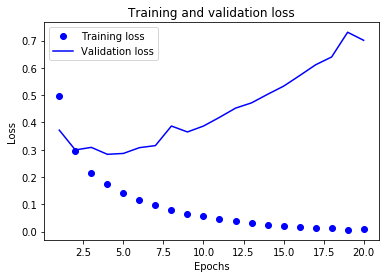

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

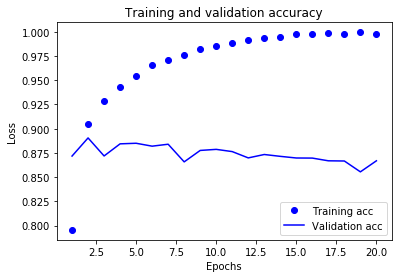

In [22]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4


  512/25000 [..............................] - ETA: 10:28 - loss: 0.6932 - acc: 0.5117

 1024/25000 [>.............................] - ETA: 5:10 - loss: 0.6887 - acc: 0.5586 

 1536/25000 [>.............................] - ETA: 3:24 - loss: 0.6822 - acc: 0.5833

 2048/25000 [=>............................] - ETA: 2:31 - loss: 0.6793 - acc: 0.5796

 2560/25000 [==>...........................] - ETA: 1:59 - loss: 0.6727 - acc: 0.6012

 3072/25000 [==>...........................] - ETA: 1:38 - loss: 0.6668 - acc: 0.6224

 3584/25000 [===>..........................] - ETA: 1:22 - loss: 0.6613 - acc: 0.6348

 4096/25000 [===>..........................] - ETA: 1:11 - loss: 0.6567 - acc: 0.6433

 4608/25000 [====>.........................] - ETA: 1:02 - loss: 0.6507 - acc: 0.6595

 5120/25000 [=====>........................] - ETA: 54s - loss: 0.6427 - acc: 0.6744 

 5632/25000 [=====>........................] - ETA: 49s - loss: 0.6361 - acc: 0.6863

 6144/25000 [======>.......................] - ETA: 44s - loss: 0.6305 - acc: 0.6965

 6656/25000 [======>.......................] - ETA: 40s - loss: 0.6240 - acc: 0.7070

 7168/25000 [=======>......................] - ETA: 36s - loss: 0.6186 - acc: 0.7144

 7680/25000 [========>.....................] - ETA: 33s - loss: 0.6130 - acc: 0.7207

 8192/25000 [========>.....................] - ETA: 30s - loss: 0.6078 - acc: 0.7274

 8704/25000 [=========>....................] - ETA: 27s - loss: 0.6020 - acc: 0.7336

 9216/25000 [==========>...................] - ETA: 25s - loss: 0.5964 - acc: 0.7405

 9728/25000 [==========>...................] - ETA: 23s - loss: 0.5907 - acc: 0.7469

10240/25000 [===========>..................] - ETA: 22s - loss: 0.5855 - acc: 0.7517

10752/25000 [===========>..................] - ETA: 20s - loss: 0.5799 - acc: 0.7574

11264/25000 [============>.................] - ETA: 18s - loss: 0.5749 - acc: 0.7623

11776/25000 [=============>................] - ETA: 17s - loss: 0.5700 - acc: 0.7660

12288/25000 [=============>................] - ETA: 16s - loss: 0.5649 - acc: 0.7698

12800/25000 [==============>...............] - ETA: 15s - loss: 0.5607 - acc: 0.7737

13312/25000 [==============>...............] - ETA: 13s - loss: 0.5561 - acc: 0.7758

13824/25000 [===============>..............] - ETA: 13s - loss: 0.5522 - acc: 0.7789

14336/25000 [================>.............] - ETA: 12s - loss: 0.5472 - acc: 0.7831

14848/25000 [================>.............] - ETA: 11s - loss: 0.5425 - acc: 0.7860

15360/25000 [=================>............] - ETA: 10s - loss: 0.5379 - acc: 0.7887

15872/25000 [==================>...........] - ETA: 9s - loss: 0.5334 - acc: 0.7917 

16384/25000 [==================>...........] - ETA: 9s - loss: 0.5303 - acc: 0.7932

16896/25000 [===================>..........] - ETA: 8s - loss: 0.5269 - acc: 0.7948

17408/25000 [===================>..........] - ETA: 7s - loss: 0.5228 - acc: 0.7973

17920/25000 [====================>.........] - ETA: 7s - loss: 0.5183 - acc: 0.8004

18432/25000 [=====================>........] - ETA: 6s - loss: 0.5149 - acc: 0.8024

18944/25000 [=====================>........] - ETA: 5s - loss: 0.5117 - acc: 0.8036

19456/25000 [======================>.......] - ETA: 5s - loss: 0.5080 - acc: 0.8052

19968/25000 [======================>.......] - ETA: 4s - loss: 0.5053 - acc: 0.8063

20480/25000 [=======================>......] - ETA: 4s - loss: 0.5018 - acc: 0.8085

20992/25000 [========================>.....] - ETA: 3s - loss: 0.4995 - acc: 0.8095

21504/25000 [========================>.....] - ETA: 3s - loss: 0.4964 - acc: 0.8109

22016/25000 [=========================>....] - ETA: 2s - loss: 0.4935 - acc: 0.8118

22528/25000 [==========================>...] - ETA: 2s - loss: 0.4907 - acc: 0.8131

23040/25000 [==========================>...] - ETA: 1s - loss: 0.4877 - acc: 0.8145

23552/25000 [===========================>..] - ETA: 1s - loss: 0.4844 - acc: 0.8165

24064/25000 [===========================>..] - ETA: 0s - loss: 0.4806 - acc: 0.8189

24576/25000 [============================>.] - ETA: 0s - loss: 0.4774 - acc: 0.8206

25000/25000 [==============================] - 21s 834us/step - loss: 0.4749 - acc: 0.8218


Epoch 2/4
  512/25000 [..............................] - ETA: 5s - loss: 0.2890 - acc: 0.9277

 1024/25000 [>.............................] - ETA: 6s - loss: 0.2979 - acc: 0.9219

 1536/25000 [>.............................] - ETA: 5s - loss: 0.3000 - acc: 0.9115

 2048/25000 [=>............................] - ETA: 5s - loss: 0.3003 - acc: 0.9106

 2560/25000 [==>...........................] - ETA: 6s - loss: 0.2972 - acc: 0.9105

 3072/25000 [==>...........................] - ETA: 7s - loss: 0.2950 - acc: 0.9128

 3584/25000 [===>..........................] - ETA: 6s - loss: 0.2937 - acc: 0.9129

 4096/25000 [===>..........................] - ETA: 6s - loss: 0.2937 - acc: 0.9124

 4608/25000 [====>.........................] - ETA: 5s - loss: 0.2923 - acc: 0.9108

 5120/25000 [=====>........................] - ETA: 5s - loss: 0.2928 - acc: 0.9111

 5632/25000 [=====>........................] - ETA: 7s - loss: 0.2945 - acc: 0.9100

 6144/25000 [======>.......................] - ETA: 6s - loss: 0.2928 - acc: 0.9098

 6656/25000 [======>.......................] - ETA: 6s - loss: 0.2925 - acc: 0.9091

 7168/25000 [=======>......................] - ETA: 6s - loss: 0.2892 - acc: 0.9106

 7680/25000 [========>.....................] - ETA: 5s - loss: 0.2883 - acc: 0.9103

 8192/25000 [========>.....................] - ETA: 5s - loss: 0.2876 - acc: 0.9104

 8704/25000 [=========>....................] - ETA: 5s - loss: 0.2882 - acc: 0.9084

 9216/25000 [==========>...................] - ETA: 5s - loss: 0.2861 - acc: 0.9095

 9728/25000 [==========>...................] - ETA: 4s - loss: 0.2842 - acc: 0.9105



10240/25000 [===========>..................] - ETA: 4s - loss: 0.2821 - acc: 0.9112

10752/25000 [===========>..................] - ETA: 4s - loss: 0.2808 - acc: 0.9116

11264/25000 [============>.................] - ETA: 4s - loss: 0.2801 - acc: 0.9118

11776/25000 [=============>................] - ETA: 4s - loss: 0.2784 - acc: 0.9121

12288/25000 [=============>................] - ETA: 3s - loss: 0.2770 - acc: 0.9128

12800/25000 [==============>...............] - ETA: 3s - loss: 0.2781 - acc: 0.9118

13312/25000 [==============>...............] - ETA: 3s - loss: 0.2767 - acc: 0.9118

13824/25000 [===============>..............] - ETA: 3s - loss: 0.2757 - acc: 0.9123

14336/25000 [================>.............] - ETA: 3s - loss: 0.2758 - acc: 0.9118

14848/25000 [================>.............] - ETA: 2s - loss: 0.2756 - acc: 0.9114

15360/25000 [=================>............] - ETA: 2s - loss: 0.2745 - acc: 0.9117

15872/25000 [==================>...........] - ETA: 2s - loss: 0.2734 - acc: 0.9120

16384/25000 [==================>...........] - ETA: 2s - loss: 0.2739 - acc: 0.9113

16896/25000 [===================>..........] - ETA: 2s - loss: 0.2734 - acc: 0.9112

17408/25000 [===================>..........] - ETA: 2s - loss: 0.2732 - acc: 0.9106

17920/25000 [====================>.........] - ETA: 2s - loss: 0.2727 - acc: 0.9103

18432/25000 [=====================>........] - ETA: 1s - loss: 0.2718 - acc: 0.9105

18944/25000 [=====================>........] - ETA: 1s - loss: 0.2706 - acc: 0.9107

19456/25000 [======================>.......] - ETA: 1s - loss: 0.2703 - acc: 0.9107

19968/25000 [======================>.......] - ETA: 1s - loss: 0.2698 - acc: 0.9106

20480/25000 [=======================>......] - ETA: 1s - loss: 0.2698 - acc: 0.9100

20992/25000 [========================>.....] - ETA: 1s - loss: 0.2692 - acc: 0.9101

21504/25000 [========================>.....] - ETA: 1s - loss: 0.2685 - acc: 0.9104

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2690 - acc: 0.9097

22528/25000 [==========================>...] - ETA: 0s - loss: 0.2683 - acc: 0.9099

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2675 - acc: 0.9102

23552/25000 [===========================>..] - ETA: 0s - loss: 0.2666 - acc: 0.9104

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2662 - acc: 0.9102

24576/25000 [============================>.] - ETA: 0s - loss: 0.2656 - acc: 0.9101

25000/25000 [==============================] - 7s 277us/step - loss: 0.2660 - acc: 0.9097


Epoch 3/4


  512/25000 [..............................] - ETA: 5s - loss: 0.1992 - acc: 0.9434

 1024/25000 [>.............................] - ETA: 5s - loss: 0.1917 - acc: 0.9424

 1536/25000 [>.............................] - ETA: 4s - loss: 0.1968 - acc: 0.9388

 2048/25000 [=>............................] - ETA: 4s - loss: 0.1991 - acc: 0.9346

 2560/25000 [==>...........................] - ETA: 4s - loss: 0.2034 - acc: 0.9324

 3072/25000 [==>...........................] - ETA: 4s - loss: 0.2057 - acc: 0.9323

 3584/25000 [===>..........................] - ETA: 4s - loss: 0.1992 - acc: 0.9367

 4096/25000 [===>..........................] - ETA: 5s - loss: 0.1977 - acc: 0.9375

 4608/25000 [====>.........................] - ETA: 5s - loss: 0.1987 - acc: 0.9360

 5120/25000 [=====>........................] - ETA: 4s - loss: 0.1984 - acc: 0.9344

 5632/25000 [=====>........................] - ETA: 4s - loss: 0.2035 - acc: 0.9318

 6144/25000 [======>.......................] - ETA: 4s - loss: 0.2045 - acc: 0.9316

 6656/25000 [======>.......................] - ETA: 4s - loss: 0.2030 - acc: 0.9325

 7168/25000 [=======>......................] - ETA: 4s - loss: 0.2013 - acc: 0.9325

 7680/25000 [========>.....................] - ETA: 4s - loss: 0.2014 - acc: 0.9324

 8192/25000 [========>.....................] - ETA: 3s - loss: 0.2007 - acc: 0.9316

 8704/25000 [=========>....................] - ETA: 3s - loss: 0.2008 - acc: 0.9314

 9216/25000 [==========>...................] - ETA: 3s - loss: 0.2010 - acc: 0.9316

 9728/25000 [==========>...................] - ETA: 3s - loss: 0.2022 - acc: 0.9312

10240/25000 [===========>..................] - ETA: 3s - loss: 0.2032 - acc: 0.9304

10752/25000 [===========>..................] - ETA: 3s - loss: 0.2058 - acc: 0.9289

11264/25000 [============>.................] - ETA: 3s - loss: 0.2043 - acc: 0.9298

11776/25000 [=============>................] - ETA: 2s - loss: 0.2032 - acc: 0.9305

12288/25000 [=============>................] - ETA: 2s - loss: 0.2041 - acc: 0.9298

12800/25000 [==============>...............] - ETA: 2s - loss: 0.2035 - acc: 0.9302

13312/25000 [==============>...............] - ETA: 2s - loss: 0.2025 - acc: 0.9307

13824/25000 [===============>..............] - ETA: 2s - loss: 0.2024 - acc: 0.9308

14336/25000 [================>.............] - ETA: 2s - loss: 0.2025 - acc: 0.9309

14848/25000 [================>.............] - ETA: 2s - loss: 0.2034 - acc: 0.9304

15360/25000 [=================>............] - ETA: 2s - loss: 0.2031 - acc: 0.9303

15872/25000 [==================>...........] - ETA: 1s - loss: 0.2032 - acc: 0.9304

16384/25000 [==================>...........] - ETA: 1s - loss: 0.2035 - acc: 0.9299

16896/25000 [===================>..........] - ETA: 1s - loss: 0.2032 - acc: 0.9297

17408/25000 [===================>..........] - ETA: 1s - loss: 0.2026 - acc: 0.9297

17920/25000 [====================>.........] - ETA: 1s - loss: 0.2013 - acc: 0.9302

18432/25000 [=====================>........] - ETA: 1s - loss: 0.2012 - acc: 0.9299

18944/25000 [=====================>........] - ETA: 1s - loss: 0.2005 - acc: 0.9302

19456/25000 [======================>.......] - ETA: 1s - loss: 0.1999 - acc: 0.9302

19968/25000 [======================>.......] - ETA: 1s - loss: 0.1991 - acc: 0.9303

20480/25000 [=======================>......] - ETA: 0s - loss: 0.1989 - acc: 0.9303

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1981 - acc: 0.9308

21504/25000 [========================>.....] - ETA: 0s - loss: 0.1981 - acc: 0.9309

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1977 - acc: 0.9306

22528/25000 [==========================>...] - ETA: 0s - loss: 0.1978 - acc: 0.9304

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1991 - acc: 0.9297

23552/25000 [===========================>..] - ETA: 0s - loss: 0.1998 - acc: 0.9293

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1992 - acc: 0.9296

24576/25000 [============================>.] - ETA: 0s - loss: 0.1986 - acc: 0.9296

25000/25000 [==============================] - 5s 202us/step - loss: 0.1983 - acc: 0.9296


Epoch 4/4


  512/25000 [..............................] - ETA: 4s - loss: 0.1774 - acc: 0.9297

 1024/25000 [>.............................] - ETA: 4s - loss: 0.1686 - acc: 0.9375

 1536/25000 [>.............................] - ETA: 4s - loss: 0.1711 - acc: 0.9323

 2048/25000 [=>............................] - ETA: 4s - loss: 0.1718 - acc: 0.9336

 2560/25000 [==>...........................] - ETA: 4s - loss: 0.1688 - acc: 0.9383

 3072/25000 [==>...........................] - ETA: 4s - loss: 0.1655 - acc: 0.9395

 3584/25000 [===>..........................] - ETA: 4s - loss: 0.1613 - acc: 0.9406

 4096/25000 [===>..........................] - ETA: 4s - loss: 0.1586 - acc: 0.9419

 4608/25000 [====>.........................] - ETA: 3s - loss: 0.1600 - acc: 0.9418

 5120/25000 [=====>........................] - ETA: 3s - loss: 0.1591 - acc: 0.9428

 5632/25000 [=====>........................] - ETA: 3s - loss: 0.1587 - acc: 0.9439

 6144/25000 [======>.......................] - ETA: 3s - loss: 0.1595 - acc: 0.9440

 6656/25000 [======>.......................] - ETA: 3s - loss: 0.1597 - acc: 0.9443

 7168/25000 [=======>......................] - ETA: 3s - loss: 0.1592 - acc: 0.9443

 7680/25000 [========>.....................] - ETA: 3s - loss: 0.1586 - acc: 0.9447

 8192/25000 [========>.....................] - ETA: 3s - loss: 0.1573 - acc: 0.9456



 8704/25000 [=========>....................] - ETA: 3s - loss: 0.1569 - acc: 0.9457

 9216/25000 [==========>...................] - ETA: 3s - loss: 0.1584 - acc: 0.9450

 9728/25000 [==========>...................] - ETA: 3s - loss: 0.1590 - acc: 0.9446

10240/25000 [===========>..................] - ETA: 2s - loss: 0.1587 - acc: 0.9447

10752/25000 [===========>..................] - ETA: 2s - loss: 0.1596 - acc: 0.9450

11264/25000 [============>.................] - ETA: 2s - loss: 0.1595 - acc: 0.9447

11776/25000 [=============>................] - ETA: 2s - loss: 0.1607 - acc: 0.9442

12288/25000 [=============>................] - ETA: 2s - loss: 0.1606 - acc: 0.9442

12800/25000 [==============>...............] - ETA: 2s - loss: 0.1622 - acc: 0.9433

13312/25000 [==============>...............] - ETA: 2s - loss: 0.1610 - acc: 0.9443

13824/25000 [===============>..............] - ETA: 2s - loss: 0.1607 - acc: 0.9447

14336/25000 [================>.............] - ETA: 2s - loss: 0.1604 - acc: 0.9448

14848/25000 [================>.............] - ETA: 1s - loss: 0.1605 - acc: 0.9446

15360/25000 [=================>............] - ETA: 1s - loss: 0.1609 - acc: 0.9441

15872/25000 [==================>...........] - ETA: 1s - loss: 0.1616 - acc: 0.9441

16384/25000 [==================>...........] - ETA: 1s - loss: 0.1610 - acc: 0.9441

16896/25000 [===================>..........] - ETA: 1s - loss: 0.1608 - acc: 0.9440

17408/25000 [===================>..........] - ETA: 1s - loss: 0.1607 - acc: 0.9437

17920/25000 [====================>.........] - ETA: 1s - loss: 0.1604 - acc: 0.9435

18432/25000 [=====================>........] - ETA: 1s - loss: 0.1612 - acc: 0.9431

18944/25000 [=====================>........] - ETA: 1s - loss: 0.1624 - acc: 0.9427

19456/25000 [======================>.......] - ETA: 1s - loss: 0.1626 - acc: 0.9425

19968/25000 [======================>.......] - ETA: 1s - loss: 0.1632 - acc: 0.9424

20480/25000 [=======================>......] - ETA: 0s - loss: 0.1633 - acc: 0.9424

20992/25000 [========================>.....] - ETA: 0s - loss: 0.1629 - acc: 0.9427

21504/25000 [========================>.....] - ETA: 0s - loss: 0.1626 - acc: 0.9428

22016/25000 [=========================>....] - ETA: 0s - loss: 0.1633 - acc: 0.9426

22528/25000 [==========================>...] - ETA: 0s - loss: 0.1645 - acc: 0.9421

23040/25000 [==========================>...] - ETA: 0s - loss: 0.1646 - acc: 0.9418

23552/25000 [===========================>..] - ETA: 0s - loss: 0.1658 - acc: 0.9411

24064/25000 [===========================>..] - ETA: 0s - loss: 0.1669 - acc: 0.9405

24576/25000 [============================>.] - ETA: 0s - loss: 0.1667 - acc: 0.9406

25000/25000 [==============================] - 5s 212us/step - loss: 0.1678 - acc: 0.9400


   32/25000 [..............................] - ETA: 28:42

   64/25000 [..............................] - ETA: 23:32

   96/25000 [..............................] - ETA: 17:14

  128/25000 [..............................] - ETA: 14:09

  160/25000 [..............................] - ETA: 11:44

  192/25000 [..............................] - ETA: 11:13

  224/25000 [..............................] - ETA: 10:32

  256/25000 [..............................] - ETA: 9:46 

  288/25000 [..............................] - ETA: 8:54

  320/25000 [..............................] - ETA: 8:16

  352/25000 [..............................] - ETA: 7:50

  384/25000 [..............................] - ETA: 7:20

  416/25000 [..............................] - ETA: 7:02

  448/25000 [..............................] - ETA: 6:48

  480/25000 [..............................] - ETA: 6:37

  512/25000 [..............................] - ETA: 6:24

  544/25000 [..............................] - ETA: 6:15

  576/25000 [..............................] - ETA: 6:09

  608/25000 [..............................] - ETA: 5:56

  640/25000 [..............................] - ETA: 5:45

  672/25000 [..............................] - ETA: 5:34

  704/25000 [..............................] - ETA: 5:32

  736/25000 [..............................] - ETA: 5:20

  768/25000 [..............................] - ETA: 5:08

  800/25000 [..............................] - ETA: 5:03

  832/25000 [..............................] - ETA: 4:58

  864/25000 [>.............................] - ETA: 4:48

  896/25000 [>.............................] - ETA: 4:43

  960/25000 [>.............................] - ETA: 4:35

  992/25000 [>.............................] - ETA: 4:28

 1024/25000 [>.............................] - ETA: 4:25

 1088/25000 [>.............................] - ETA: 4:11

 1120/25000 [>.............................] - ETA: 4:05

 1152/25000 [>.............................] - ETA: 4:04

 1184/25000 [>.............................] - ETA: 4:01

 1216/25000 [>.............................] - ETA: 4:00

 1248/25000 [>.............................] - ETA: 3:55

 1280/25000 [>.............................] - ETA: 3:50

 1312/25000 [>.............................] - ETA: 3:52

 1344/25000 [>.............................] - ETA: 3:59

 1376/25000 [>.............................] - ETA: 3:57

 1408/25000 [>.............................] - ETA: 4:00

 1440/25000 [>.............................] - ETA: 4:01

 1472/25000 [>.............................] - ETA: 4:01

 1504/25000 [>.............................] - ETA: 4:07

 1536/25000 [>.............................] - ETA: 4:13

 1568/25000 [>.............................] - ETA: 4:13

 1600/25000 [>.............................] - ETA: 4:13

 1632/25000 [>.............................] - ETA: 4:19

 1664/25000 [>.............................] - ETA: 4:24

 1696/25000 [=>............................] - ETA: 4:28

 1728/25000 [=>............................] - ETA: 4:28

 1760/25000 [=>............................] - ETA: 4:29

 1792/25000 [=>............................] - ETA: 4:28

 1856/25000 [=>............................] - ETA: 4:19

 1888/25000 [=>............................] - ETA: 4:20

 1920/25000 [=>............................] - ETA: 4:22

 1952/25000 [=>............................] - ETA: 4:19

 1984/25000 [=>............................] - ETA: 4:26

 2016/25000 [=>............................] - ETA: 4:28

 2048/25000 [=>............................] - ETA: 4:27

 2080/25000 [=>............................] - ETA: 4:36

 2144/25000 [=>............................] - ETA: 4:33

 2208/25000 [=>............................] - ETA: 4:34

 2240/25000 [=>............................] - ETA: 4:33

 2272/25000 [=>............................] - ETA: 4:32

 2336/25000 [=>............................] - ETA: 4:29

 2368/25000 [=>............................] - ETA: 4:30

 2400/25000 [=>............................] - ETA: 4:30

 2432/25000 [=>............................] - ETA: 4:32

 2496/25000 [=>............................] - ETA: 4:30

 2528/25000 [==>...........................] - ETA: 4:31

 2560/25000 [==>...........................] - ETA: 4:29

 2592/25000 [==>...........................] - ETA: 4:30

 2624/25000 [==>...........................] - ETA: 4:35

 2656/25000 [==>...........................] - ETA: 4:37

 2688/25000 [==>...........................] - ETA: 4:39

 2720/25000 [==>...........................] - ETA: 4:40

 2752/25000 [==>...........................] - ETA: 4:39

 2784/25000 [==>...........................] - ETA: 4:39

 2816/25000 [==>...........................] - ETA: 4:37

 2848/25000 [==>...........................] - ETA: 4:38

 2880/25000 [==>...........................] - ETA: 4:42

 2912/25000 [==>...........................] - ETA: 4:46

 2944/25000 [==>...........................] - ETA: 4:47

 2976/25000 [==>...........................] - ETA: 4:49

 3008/25000 [==>...........................] - ETA: 4:56

 3040/25000 [==>...........................] - ETA: 4:59

 3072/25000 [==>...........................] - ETA: 5:04

 3104/25000 [==>...........................] - ETA: 5:06

 3136/25000 [==>...........................] - ETA: 5:04

 3168/25000 [==>...........................] - ETA: 5:05

 3200/25000 [==>...........................] - ETA: 5:03

 3232/25000 [==>...........................] - ETA: 5:08

 3264/25000 [==>...........................] - ETA: 5:08

 3296/25000 [==>...........................] - ETA: 5:10

 3328/25000 [==>...........................] - ETA: 5:11

 3360/25000 [===>..........................] - ETA: 5:10

 3392/25000 [===>..........................] - ETA: 5:09

 3424/25000 [===>..........................] - ETA: 5:08

 3456/25000 [===>..........................] - ETA: 5:09

 3488/25000 [===>..........................] - ETA: 5:08

 3520/25000 [===>..........................] - ETA: 5:06

 3552/25000 [===>..........................] - ETA: 5:05

 3584/25000 [===>..........................] - ETA: 5:04

 3616/25000 [===>..........................] - ETA: 5:04

 3648/25000 [===>..........................] - ETA: 5:03

 3680/25000 [===>..........................] - ETA: 5:03

 3712/25000 [===>..........................] - ETA: 5:02

 3744/25000 [===>..........................] - ETA: 5:02

 3776/25000 [===>..........................] - ETA: 5:01

 3808/25000 [===>..........................] - ETA: 4:59

 3840/25000 [===>..........................] - ETA: 5:00

 3872/25000 [===>..........................] - ETA: 4:58

 3904/25000 [===>..........................] - ETA: 4:57

 3936/25000 [===>..........................] - ETA: 4:55

 3968/25000 [===>..........................] - ETA: 4:57

 4000/25000 [===>..........................] - ETA: 4:57

 4032/25000 [===>..........................] - ETA: 4:57

 4064/25000 [===>..........................] - ETA: 4:56

 4096/25000 [===>..........................] - ETA: 4:54

 4128/25000 [===>..........................] - ETA: 4:52

 4160/25000 [===>..........................] - ETA: 4:52

 4192/25000 [====>.........................] - ETA: 4:50

 4224/25000 [====>.........................] - ETA: 4:48

 4256/25000 [====>.........................] - ETA: 4:48

 4288/25000 [====>.........................] - ETA: 4:46

 4320/25000 [====>.........................] - ETA: 4:47

 4352/25000 [====>.........................] - ETA: 4:47

 4384/25000 [====>.........................] - ETA: 4:50

 4416/25000 [====>.........................] - ETA: 4:48

 4448/25000 [====>.........................] - ETA: 4:53

 4480/25000 [====>.........................] - ETA: 4:52

 4544/25000 [====>.........................] - ETA: 4:50

 4576/25000 [====>.........................] - ETA: 4:49

 4608/25000 [====>.........................] - ETA: 4:48

 4640/25000 [====>.........................] - ETA: 4:47

 4672/25000 [====>.........................] - ETA: 4:47

 4704/25000 [====>.........................] - ETA: 4:45

 4736/25000 [====>.........................] - ETA: 4:44

 4768/25000 [====>.........................] - ETA: 4:43

 4800/25000 [====>.........................] - ETA: 4:42

 4832/25000 [====>.........................] - ETA: 4:40

 4864/25000 [====>.........................] - ETA: 4:40

 4896/25000 [====>.........................] - ETA: 4:38

 4928/25000 [====>.........................] - ETA: 4:37

 4960/25000 [====>.........................] - ETA: 4:36

 4992/25000 [====>.........................] - ETA: 4:35

 5024/25000 [=====>........................] - ETA: 4:34

 5056/25000 [=====>........................] - ETA: 4:33

 5088/25000 [=====>........................] - ETA: 4:32

 5120/25000 [=====>........................] - ETA: 4:31

 5152/25000 [=====>........................] - ETA: 4:31

 5184/25000 [=====>........................] - ETA: 4:30

 5216/25000 [=====>........................] - ETA: 4:30

 5280/25000 [=====>........................] - ETA: 4:27

 5312/25000 [=====>........................] - ETA: 4:25

 5344/25000 [=====>........................] - ETA: 4:24

 5408/25000 [=====>........................] - ETA: 4:20

 5440/25000 [=====>........................] - ETA: 4:19

 5472/25000 [=====>........................] - ETA: 4:18

 5504/25000 [=====>........................] - ETA: 4:17

 5536/25000 [=====>........................] - ETA: 4:15

 5568/25000 [=====>........................] - ETA: 4:14

 5600/25000 [=====>........................] - ETA: 4:12

 5632/25000 [=====>........................] - ETA: 4:11

 5664/25000 [=====>........................] - ETA: 4:10

 5696/25000 [=====>........................] - ETA: 4:09

 5728/25000 [=====>........................] - ETA: 4:08

 5760/25000 [=====>........................] - ETA: 4:07

 5792/25000 [=====>........................] - ETA: 4:05

 5824/25000 [=====>........................] - ETA: 4:04

 5856/25000 [======>.......................] - ETA: 4:03

 5888/25000 [======>.......................] - ETA: 4:03

 5920/25000 [======>.......................] - ETA: 4:02

 5952/25000 [======>.......................] - ETA: 4:02

 5984/25000 [======>.......................] - ETA: 4:00

 6048/25000 [======>.......................] - ETA: 3:58

 6080/25000 [======>.......................] - ETA: 3:56

 6112/25000 [======>.......................] - ETA: 3:56

 6144/25000 [======>.......................] - ETA: 3:55

 6176/25000 [======>.......................] - ETA: 3:53

 6208/25000 [======>.......................] - ETA: 3:53

 6240/25000 [======>.......................] - ETA: 3:52

 6272/25000 [======>.......................] - ETA: 3:51

 6304/25000 [======>.......................] - ETA: 3:49

 6336/25000 [======>.......................] - ETA: 3:48

 6368/25000 [======>.......................] - ETA: 3:47

 6400/25000 [======>.......................] - ETA: 3:45

 6464/25000 [======>.......................] - ETA: 3:43

 6496/25000 [======>.......................] - ETA: 3:41

 6528/25000 [======>.......................] - ETA: 3:40

 6560/25000 [======>.......................] - ETA: 3:39

 6592/25000 [======>.......................] - ETA: 3:38

 6624/25000 [======>.......................] - ETA: 3:37

 6656/25000 [======>.......................] - ETA: 3:36

 6688/25000 [=======>......................] - ETA: 3:35

 6720/25000 [=======>......................] - ETA: 3:34

 6752/25000 [=======>......................] - ETA: 3:33

 6784/25000 [=======>......................] - ETA: 3:32

 6816/25000 [=======>......................] - ETA: 3:31

 6848/25000 [=======>......................] - ETA: 3:30

 6912/25000 [=======>......................] - ETA: 3:27

 6976/25000 [=======>......................] - ETA: 3:25

 7008/25000 [=======>......................] - ETA: 3:24

 7040/25000 [=======>......................] - ETA: 3:23

 7104/25000 [=======>......................] - ETA: 3:21

 7136/25000 [=======>......................] - ETA: 3:20

 7168/25000 [=======>......................] - ETA: 3:21

 7200/25000 [=======>......................] - ETA: 3:20

 7232/25000 [=======>......................] - ETA: 3:20

 7264/25000 [=======>......................] - ETA: 3:19

 7296/25000 [=======>......................] - ETA: 3:18

 7328/25000 [=======>......................] - ETA: 3:17

 7360/25000 [=======>......................] - ETA: 3:16

 7392/25000 [=======>......................] - ETA: 3:15

 7456/25000 [=======>......................] - ETA: 3:13

 7488/25000 [=======>......................] - ETA: 3:12

 7520/25000 [========>.....................] - ETA: 3:11

 7552/25000 [========>.....................] - ETA: 3:10

 7584/25000 [========>.....................] - ETA: 3:10

 7616/25000 [========>.....................] - ETA: 3:09

 7648/25000 [========>.....................] - ETA: 3:08

 7680/25000 [========>.....................] - ETA: 3:07

 7712/25000 [========>.....................] - ETA: 3:06

 7744/25000 [========>.....................] - ETA: 3:05

 7776/25000 [========>.....................] - ETA: 3:04

 7808/25000 [========>.....................] - ETA: 3:03

 7872/25000 [========>.....................] - ETA: 3:01

 7936/25000 [========>.....................] - ETA: 2:59

 8000/25000 [========>.....................] - ETA: 2:57

 8064/25000 [========>.....................] - ETA: 2:56

 8096/25000 [========>.....................] - ETA: 2:55

 8128/25000 [========>.....................] - ETA: 2:54

 8160/25000 [========>.....................] - ETA: 2:53

 8224/25000 [========>.....................] - ETA: 2:52

 8256/25000 [========>.....................] - ETA: 2:51

 8288/25000 [========>.....................] - ETA: 2:50

 8320/25000 [========>.....................] - ETA: 2:49

 8352/25000 [=========>....................] - ETA: 2:49

 8384/25000 [=========>....................] - ETA: 2:48

 8416/25000 [=========>....................] - ETA: 2:47

 8448/25000 [=========>....................] - ETA: 2:46

 8544/25000 [=========>....................] - ETA: 2:44

 8608/25000 [=========>....................] - ETA: 2:42

 8704/25000 [=========>....................] - ETA: 2:40

 8800/25000 [=========>....................] - ETA: 2:37

 8832/25000 [=========>....................] - ETA: 2:37

 8928/25000 [=========>....................] - ETA: 2:34

 8960/25000 [=========>....................] - ETA: 2:34

 9024/25000 [=========>....................] - ETA: 2:32

 9056/25000 [=========>....................] - ETA: 2:31

 9120/25000 [=========>....................] - ETA: 2:30

 9184/25000 [==========>...................] - ETA: 2:28

 9248/25000 [==========>...................] - ETA: 2:27

 9280/25000 [==========>...................] - ETA: 2:26

 9344/25000 [==========>...................] - ETA: 2:25

 9376/25000 [==========>...................] - ETA: 2:24

 9472/25000 [==========>...................] - ETA: 2:22

 9504/25000 [==========>...................] - ETA: 2:21

 9568/25000 [==========>...................] - ETA: 2:20

 9632/25000 [==========>...................] - ETA: 2:18

 9696/25000 [==========>...................] - ETA: 2:17

 9760/25000 [==========>...................] - ETA: 2:16

 9824/25000 [==========>...................] - ETA: 2:15

 9856/25000 [==========>...................] - ETA: 2:14

 9920/25000 [==========>...................] - ETA: 2:13

 9984/25000 [==========>...................] - ETA: 2:11

10016/25000 [===========>..................] - ETA: 2:11

10048/25000 [===========>..................] - ETA: 2:10

10080/25000 [===========>..................] - ETA: 2:10

10112/25000 [===========>..................] - ETA: 2:09

10144/25000 [===========>..................] - ETA: 2:08

10176/25000 [===========>..................] - ETA: 2:08

10240/25000 [===========>..................] - ETA: 2:07

10304/25000 [===========>..................] - ETA: 2:05

10336/25000 [===========>..................] - ETA: 2:05

10400/25000 [===========>..................] - ETA: 2:04

10464/25000 [===========>..................] - ETA: 2:03

10496/25000 [===========>..................] - ETA: 2:02

10528/25000 [===========>..................] - ETA: 2:02

10560/25000 [===========>..................] - ETA: 2:01

10624/25000 [===========>..................] - ETA: 2:00

10656/25000 [===========>..................] - ETA: 2:00

10720/25000 [===========>..................] - ETA: 1:58

10752/25000 [===========>..................] - ETA: 1:58

10784/25000 [===========>..................] - ETA: 1:57

10816/25000 [===========>..................] - ETA: 1:57

10880/25000 [============>.................] - ETA: 1:56

10912/25000 [============>.................] - ETA: 1:55

10976/25000 [============>.................] - ETA: 1:54

11008/25000 [============>.................] - ETA: 1:54

11040/25000 [============>.................] - ETA: 1:53

11072/25000 [============>.................] - ETA: 1:53

11136/25000 [============>.................] - ETA: 1:52

11168/25000 [============>.................] - ETA: 1:51

11200/25000 [============>.................] - ETA: 1:51

11232/25000 [============>.................] - ETA: 1:51

11296/25000 [============>.................] - ETA: 1:50

11328/25000 [============>.................] - ETA: 1:49

11392/25000 [============>.................] - ETA: 1:48

11456/25000 [============>.................] - ETA: 1:47

11488/25000 [============>.................] - ETA: 1:47

11552/25000 [============>.................] - ETA: 1:46

11584/25000 [============>.................] - ETA: 1:45

11616/25000 [============>.................] - ETA: 1:45

11680/25000 [=============>................] - ETA: 1:44

11744/25000 [=============>................] - ETA: 1:43

11808/25000 [=============>................] - ETA: 1:42

11872/25000 [=============>................] - ETA: 1:41

11904/25000 [=============>................] - ETA: 1:41

11968/25000 [=============>................] - ETA: 1:40

12000/25000 [=============>................] - ETA: 1:39

12032/25000 [=============>................] - ETA: 1:39

12096/25000 [=============>................] - ETA: 1:38

12128/25000 [=============>................] - ETA: 1:38

12160/25000 [=============>................] - ETA: 1:37

12192/25000 [=============>................] - ETA: 1:37

12256/25000 [=============>................] - ETA: 1:36

12288/25000 [=============>................] - ETA: 1:36

12320/25000 [=============>................] - ETA: 1:35

12384/25000 [=============>................] - ETA: 1:35

12448/25000 [=============>................] - ETA: 1:34

12512/25000 [==============>...............] - ETA: 1:33

12576/25000 [==============>...............] - ETA: 1:32

12608/25000 [==============>...............] - ETA: 1:31

12672/25000 [==============>...............] - ETA: 1:31

12736/25000 [==============>...............] - ETA: 1:30

12768/25000 [==============>...............] - ETA: 1:29

12800/25000 [==============>...............] - ETA: 1:29

12864/25000 [==============>...............] - ETA: 1:28

12928/25000 [==============>...............] - ETA: 1:27

12992/25000 [==============>...............] - ETA: 1:27

13024/25000 [==============>...............] - ETA: 1:26

13056/25000 [==============>...............] - ETA: 1:26

13088/25000 [==============>...............] - ETA: 1:25

13120/25000 [==============>...............] - ETA: 1:25

13184/25000 [==============>...............] - ETA: 1:24

13248/25000 [==============>...............] - ETA: 1:24

13280/25000 [==============>...............] - ETA: 1:23

13344/25000 [===============>..............] - ETA: 1:23

13376/25000 [===============>..............] - ETA: 1:22

13408/25000 [===============>..............] - ETA: 1:22

13440/25000 [===============>..............] - ETA: 1:22

13472/25000 [===============>..............] - ETA: 1:21

13504/25000 [===============>..............] - ETA: 1:21

13536/25000 [===============>..............] - ETA: 1:21

13568/25000 [===============>..............] - ETA: 1:20

13632/25000 [===============>..............] - ETA: 1:20

13664/25000 [===============>..............] - ETA: 1:19

13696/25000 [===============>..............] - ETA: 1:19

13728/25000 [===============>..............] - ETA: 1:19

13760/25000 [===============>..............] - ETA: 1:18

13824/25000 [===============>..............] - ETA: 1:17

13888/25000 [===============>..............] - ETA: 1:17

13952/25000 [===============>..............] - ETA: 1:16

14048/25000 [===============>..............] - ETA: 1:15

14112/25000 [===============>..............] - ETA: 1:14

14144/25000 [===============>..............] - ETA: 1:14

14240/25000 [================>.............] - ETA: 1:13

14272/25000 [================>.............] - ETA: 1:13

14304/25000 [================>.............] - ETA: 1:12

14336/25000 [================>.............] - ETA: 1:12

14368/25000 [================>.............] - ETA: 1:12

14432/25000 [================>.............] - ETA: 1:11

14496/25000 [================>.............] - ETA: 1:10

14528/25000 [================>.............] - ETA: 1:10

14560/25000 [================>.............] - ETA: 1:10

14592/25000 [================>.............] - ETA: 1:09

14624/25000 [================>.............] - ETA: 1:09

14720/25000 [================>.............] - ETA: 1:08

14784/25000 [================>.............] - ETA: 1:07

14848/25000 [================>.............] - ETA: 1:07

14912/25000 [================>.............] - ETA: 1:06

14976/25000 [================>.............] - ETA: 1:05

15008/25000 [=================>............] - ETA: 1:05

15040/25000 [=================>............] - ETA: 1:05

15104/25000 [=================>............] - ETA: 1:04

15168/25000 [=================>............] - ETA: 1:04

15264/25000 [=================>............] - ETA: 1:03

15296/25000 [=================>............] - ETA: 1:02

15328/25000 [=================>............] - ETA: 1:02

15360/25000 [=================>............] - ETA: 1:02

15424/25000 [=================>............] - ETA: 1:01

15552/25000 [=================>............] - ETA: 1:00

15616/25000 [=================>............] - ETA: 59s 

15712/25000 [=================>............] - ETA: 58s

15744/25000 [=================>............] - ETA: 58s

15776/25000 [=================>............] - ETA: 58s

15840/25000 [==================>...........] - ETA: 57s

15872/25000 [==================>...........] - ETA: 57s

15936/25000 [==================>...........] - ETA: 56s

15968/25000 [==================>...........] - ETA: 56s

16032/25000 [==================>...........] - ETA: 55s

16096/25000 [==================>...........] - ETA: 55s

16160/25000 [==================>...........] - ETA: 54s

16224/25000 [==================>...........] - ETA: 54s

16320/25000 [==================>...........] - ETA: 53s

16352/25000 [==================>...........] - ETA: 52s

16384/25000 [==================>...........] - ETA: 52s

16448/25000 [==================>...........] - ETA: 52s

16512/25000 [==================>...........] - ETA: 51s

16576/25000 [==================>...........] - ETA: 51s

16608/25000 [==================>...........] - ETA: 50s

16672/25000 [===================>..........] - ETA: 50s

16704/25000 [===================>..........] - ETA: 50s

16768/25000 [===================>..........] - ETA: 49s

16832/25000 [===================>..........] - ETA: 49s

16896/25000 [===================>..........] - ETA: 48s

16928/25000 [===================>..........] - ETA: 48s

16960/25000 [===================>..........] - ETA: 48s

17024/25000 [===================>..........] - ETA: 47s

17056/25000 [===================>..........] - ETA: 47s

17120/25000 [===================>..........] - ETA: 46s

17184/25000 [===================>..........] - ETA: 46s

17248/25000 [===================>..........] - ETA: 45s

17280/25000 [===================>..........] - ETA: 45s

17312/25000 [===================>..........] - ETA: 45s

17376/25000 [===================>..........] - ETA: 45s

17440/25000 [===================>..........] - ETA: 44s

17472/25000 [===================>..........] - ETA: 44s

17504/25000 [====================>.........] - ETA: 44s

17536/25000 [====================>.........] - ETA: 44s

17600/25000 [====================>.........] - ETA: 43s

17632/25000 [====================>.........] - ETA: 43s

17696/25000 [====================>.........] - ETA: 42s

17760/25000 [====================>.........] - ETA: 42s

17824/25000 [====================>.........] - ETA: 41s

17888/25000 [====================>.........] - ETA: 41s

17920/25000 [====================>.........] - ETA: 41s

17984/25000 [====================>.........] - ETA: 40s

18048/25000 [====================>.........] - ETA: 40s

18112/25000 [====================>.........] - ETA: 39s

18144/25000 [====================>.........] - ETA: 39s

18240/25000 [====================>.........] - ETA: 38s

18272/25000 [====================>.........] - ETA: 38s

18336/25000 [=====================>........] - ETA: 38s

18400/25000 [=====================>........] - ETA: 37s

18432/25000 [=====================>........] - ETA: 37s

18496/25000 [=====================>........] - ETA: 37s

18528/25000 [=====================>........] - ETA: 37s

18560/25000 [=====================>........] - ETA: 37s

18592/25000 [=====================>........] - ETA: 37s

18624/25000 [=====================>........] - ETA: 37s

18656/25000 [=====================>........] - ETA: 36s

18688/25000 [=====================>........] - ETA: 36s

18720/25000 [=====================>........] - ETA: 36s

18752/25000 [=====================>........] - ETA: 36s

18784/25000 [=====================>........] - ETA: 36s

18816/25000 [=====================>........] - ETA: 36s

18848/25000 [=====================>........] - ETA: 35s

18880/25000 [=====================>........] - ETA: 35s

18944/25000 [=====================>........] - ETA: 35s

18976/25000 [=====================>........] - ETA: 35s

19008/25000 [=====================>........] - ETA: 35s

19040/25000 [=====================>........] - ETA: 35s

19072/25000 [=====================>........] - ETA: 34s

19104/25000 [=====================>........] - ETA: 34s

19136/25000 [=====================>........] - ETA: 34s

19168/25000 [======================>.......] - ETA: 34s

19232/25000 [======================>.......] - ETA: 33s

19264/25000 [======================>.......] - ETA: 33s

19296/25000 [======================>.......] - ETA: 33s

19328/25000 [======================>.......] - ETA: 33s

19360/25000 [======================>.......] - ETA: 33s

19392/25000 [======================>.......] - ETA: 32s

19424/25000 [======================>.......] - ETA: 32s

19456/25000 [======================>.......] - ETA: 32s

19488/25000 [======================>.......] - ETA: 32s

19520/25000 [======================>.......] - ETA: 32s

19584/25000 [======================>.......] - ETA: 31s

19616/25000 [======================>.......] - ETA: 31s

19680/25000 [======================>.......] - ETA: 31s

19712/25000 [======================>.......] - ETA: 30s

19744/25000 [======================>.......] - ETA: 30s

19776/25000 [======================>.......] - ETA: 30s

19808/25000 [======================>.......] - ETA: 30s

19872/25000 [======================>.......] - ETA: 29s

19968/25000 [======================>.......] - ETA: 29s

20000/25000 [=======================>......] - ETA: 28s

20032/25000 [=======================>......] - ETA: 28s

20064/25000 [=======================>......] - ETA: 28s

20096/25000 [=======================>......] - ETA: 28s

20160/25000 [=======================>......] - ETA: 27s

20192/25000 [=======================>......] - ETA: 27s

20224/25000 [=======================>......] - ETA: 27s

20288/25000 [=======================>......] - ETA: 26s

20320/25000 [=======================>......] - ETA: 26s

20384/25000 [=======================>......] - ETA: 26s

20448/25000 [=======================>......] - ETA: 25s

20480/25000 [=======================>......] - ETA: 25s

20576/25000 [=======================>......] - ETA: 25s

20640/25000 [=======================>......] - ETA: 24s

20672/25000 [=======================>......] - ETA: 24s

20736/25000 [=======================>......] - ETA: 24s

20800/25000 [=======================>......] - ETA: 23s

20864/25000 [========================>.....] - ETA: 23s

20896/25000 [========================>.....] - ETA: 23s

20928/25000 [========================>.....] - ETA: 22s

20960/25000 [========================>.....] - ETA: 22s

20992/25000 [========================>.....] - ETA: 22s

21024/25000 [========================>.....] - ETA: 22s

21056/25000 [========================>.....] - ETA: 22s

21088/25000 [========================>.....] - ETA: 21s

21120/25000 [========================>.....] - ETA: 21s

21152/25000 [========================>.....] - ETA: 21s

21184/25000 [========================>.....] - ETA: 21s

21216/25000 [========================>.....] - ETA: 21s

21280/25000 [========================>.....] - ETA: 20s

21312/25000 [========================>.....] - ETA: 20s

21344/25000 [========================>.....] - ETA: 20s

21408/25000 [========================>.....] - ETA: 19s

21472/25000 [========================>.....] - ETA: 19s

21536/25000 [========================>.....] - ETA: 19s

21600/25000 [========================>.....] - ETA: 18s

21632/25000 [========================>.....] - ETA: 18s

21664/25000 [========================>.....] - ETA: 18s

21696/25000 [=========================>....] - ETA: 18s

21728/25000 [=========================>....] - ETA: 18s

21760/25000 [=========================>....] - ETA: 17s

21792/25000 [=========================>....] - ETA: 17s

21824/25000 [=========================>....] - ETA: 17s

21856/25000 [=========================>....] - ETA: 17s

21920/25000 [=========================>....] - ETA: 16s

21952/25000 [=========================>....] - ETA: 16s

22016/25000 [=========================>....] - ETA: 16s

22048/25000 [=========================>....] - ETA: 16s

22112/25000 [=========================>....] - ETA: 15s

22144/25000 [=========================>....] - ETA: 15s

22208/25000 [=========================>....] - ETA: 15s

22240/25000 [=========================>....] - ETA: 15s

22304/25000 [=========================>....] - ETA: 14s

22336/25000 [=========================>....] - ETA: 14s

22368/25000 [=========================>....] - ETA: 14s

22400/25000 [=========================>....] - ETA: 14s

22432/25000 [=========================>....] - ETA: 13s

22496/25000 [=========================>....] - ETA: 13s

22528/25000 [==========================>...] - ETA: 13s

22560/25000 [==========================>...] - ETA: 13s

22592/25000 [==========================>...] - ETA: 13s

22624/25000 [==========================>...] - ETA: 12s

22656/25000 [==========================>...] - ETA: 12s

22688/25000 [==========================>...] - ETA: 12s

22720/25000 [==========================>...] - ETA: 12s

22752/25000 [==========================>...] - ETA: 12s

22816/25000 [==========================>...] - ETA: 11s

22848/25000 [==========================>...] - ETA: 11s



22880/25000 [==========================>...] - ETA: 11s

22912/25000 [==========================>...] - ETA: 11s

22944/25000 [==========================>...] - ETA: 11s

22976/25000 [==========================>...] - ETA: 10s

23008/25000 [==========================>...] - ETA: 10s

23040/25000 [==========================>...] - ETA: 10s

23072/25000 [==========================>...] - ETA: 10s

23136/25000 [==========================>...] - ETA: 10s

23168/25000 [==========================>...] - ETA: 9s 

23200/25000 [==========================>...] - ETA: 9s

23232/25000 [==========================>...] - ETA: 9s

23296/25000 [==========================>...] - ETA: 9s

23328/25000 [==========================>...] - ETA: 9s

23392/25000 [===========================>..] - ETA: 8s

23424/25000 [===========================>..] - ETA: 8s

23456/25000 [===========================>..] - ETA: 8s

23488/25000 [===========================>..] - ETA: 8s

23552/25000 [===========================>..] - ETA: 7s

23616/25000 [===========================>..] - ETA: 7s

23712/25000 [===========================>..] - ETA: 6s

23776/25000 [===========================>..] - ETA: 6s

23808/25000 [===========================>..] - ETA: 6s

23840/25000 [===========================>..] - ETA: 6s

23936/25000 [===========================>..] - ETA: 5s

23968/25000 [===========================>..] - ETA: 5s

24064/25000 [===========================>..] - ETA: 5s

24096/25000 [===========================>..] - ETA: 4s

24128/25000 [===========================>..] - ETA: 4s

24160/25000 [===========================>..] - ETA: 4s

24224/25000 [============================>.] - ETA: 4s

24288/25000 [============================>.] - ETA: 3s

24320/25000 [============================>.] - ETA: 3s

24384/25000 [============================>.] - ETA: 3s

24448/25000 [============================>.] - ETA: 3s

24480/25000 [============================>.] - ETA: 2s

24544/25000 [============================>.] - ETA: 2s

24576/25000 [============================>.] - ETA: 2s

24640/25000 [============================>.] - ETA: 1s

24704/25000 [============================>.] - ETA: 1s

24768/25000 [============================>.] - ETA: 1s

24864/25000 [============================>.] - ETA: 0s

24896/25000 [============================>.] - ETA: 0s

24928/25000 [============================>.] - ETA: 0s

24960/25000 [============================>.] - ETA: 0s

24992/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 137s 5ms/step


In [46]:
model.predict(x_test)

array([[ 0.13922212],
       [ 0.99970335],
       [ 0.2916519 ],
       ..., 
       [ 0.07188027],
       [ 0.04328702],
       [ 0.47542539]], dtype=float32)

In [27]:
results

[0.3242534621810913, 0.87307999999999997]